## SpaCy Introduction for NLP | Rule Based Phrase Text Extraction and Matching

Part 1: https://youtu.be/08NbfA9od9w

Part 2: https://youtu.be/9FQTG0Pzv6E

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.

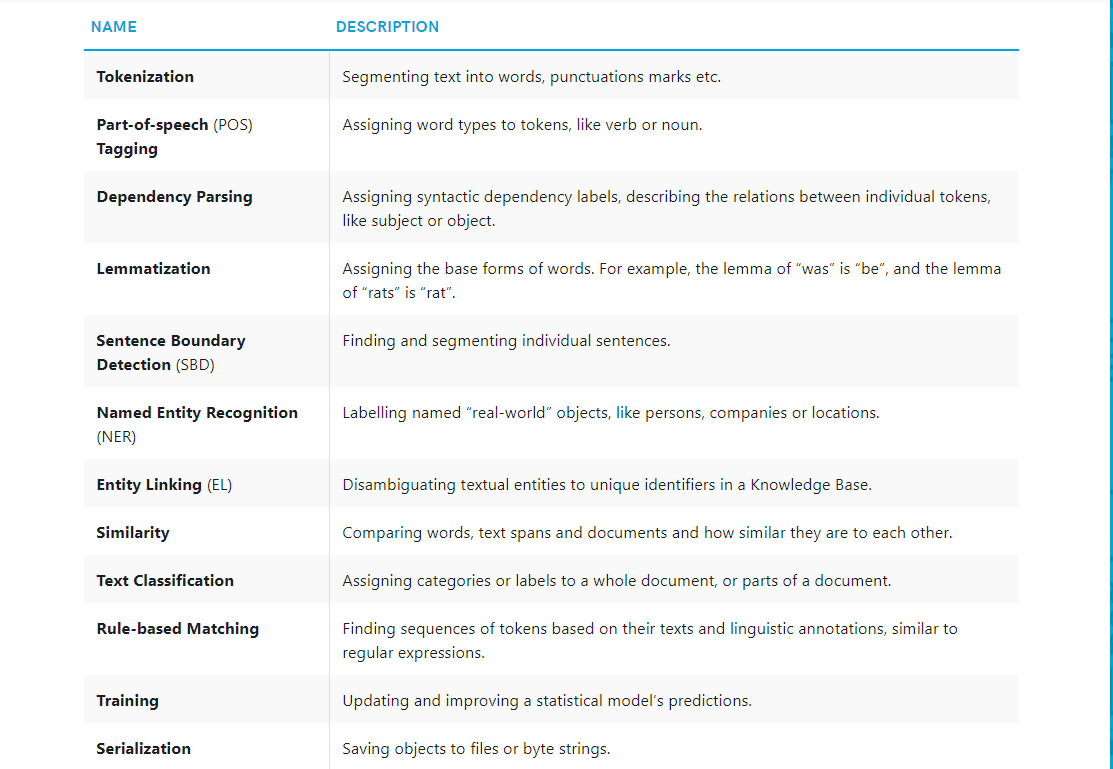

In [ ]:
# !pip install -U spacy

In [ ]:
# !pip install -U spacy-lookups-data

In [ ]:
# !python -m spacy download en_core_web_sm

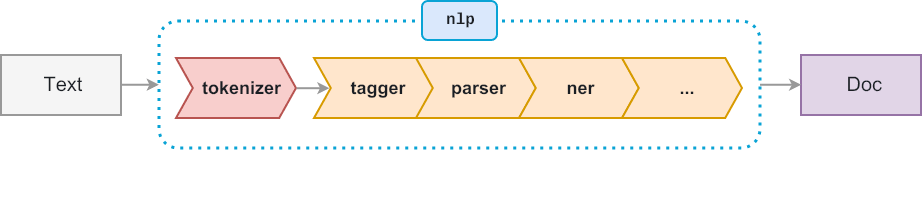

### Rule-based matching 

Compared to using regular expressions on raw text, spaCy’s rule-based matcher engines and components not only let you find you the words and phrases you’re looking for – they also give you access to the tokens within the document and their relationships. 

This means you can easily access and analyze the surrounding tokens, merge spans into single tokens or add entries to the named entities in doc.ents.


### Token-based matching 

spaCy features a rule-matching engine, the `Matcher`, that operates over tokens, similar to regular expressions. 

The rules can refer to token annotations (e.g. the token text or tag_, and flags (e.g. IS_PUNCT). 

The rule matcher also lets you pass in a custom callback to act on matches – for example, to merge entities and apply custom labels. 

You can also associate patterns with entity IDs, to allow some basic entity linking or disambiguation. To match large terminology lists, you can use the `PhraseMatcher`, which accepts Doc objects as match patterns.

#### Adding patterns 

Let’s say we want to enable spaCy to find a combination of three tokens:

1. A token whose lowercase form matches “hello”, e.g. “Hello” or “HELLO”.
2. A token whose `is_punct` flag is set to `True`, i.e. any punctuation.
3. A token whose lowercase form matches “world”, e.g. “World” or “WORLD”.

`[{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]`

When writing patterns, keep in mind that each dictionary represents one token. If spaCy’s tokenization doesn’t match the tokens defined in a pattern, the pattern is not going to produce any results. When developing complex patterns, make sure to check examples against spaCy’s tokenization

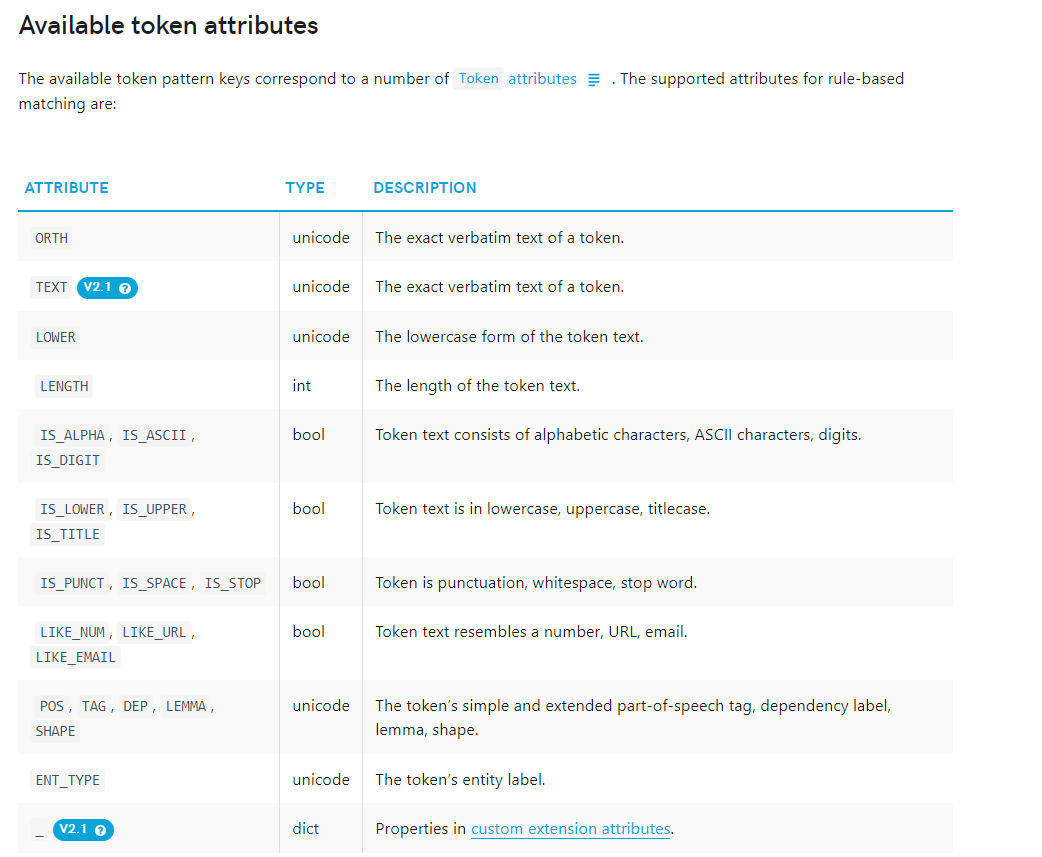

In [1]:
import spacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

In [11]:
nlp = spacy.load('en_core_web_sm')

In [3]:
doc = nlp('Hello World!')

In [4]:
doc

Hello World!

In [5]:
for token in doc:
    print(token)

Hello
World
!


In [40]:
pattern = [{"LOWER": "hello", 'OP':'?'}, {"IS_PUNCT": True, 'OP':'?'}, {"LOWER": "world"}]

In [41]:
matcher = Matcher(nlp.vocab)
matcher.add('HelloWorld', None, pattern)

In [42]:
doc = nlp("Hello, world!")

In [43]:
matches = matcher(doc)

In [44]:
matches

[(15578876784678163569, 0, 3),
 (15578876784678163569, 1, 3),
 (15578876784678163569, 2, 3)]

In [45]:
for token in doc:
    print(token)

Hello
,
world
!


In [46]:
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world
15578876784678163569 HelloWorld 1 3 , world
15578876784678163569 HelloWorld 2 3 world


##### https://explosion.ai/demos/matcher 

### Regular Expression 

In some cases, only matching tokens and token attributes isn’t enough – for example, you might want to match different spellings of a word, without having to add a new pattern for each spelling.

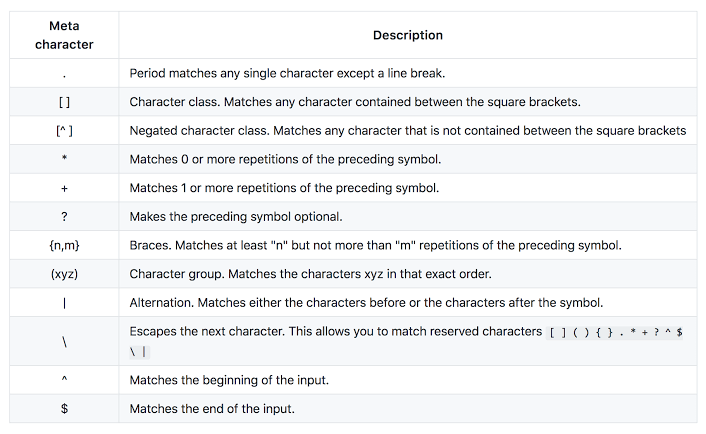

#### Identifiers 

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >\d</span></td><td>A digit</td><td>file_\d\d</td><td>file_25</td></tr>

<tr ><td><span >\w</span></td><td>Alphanumeric</td><td>\w-\w\w\w</td><td>A-b_1</td></tr>



<tr ><td><span >\s</span></td><td>White space</td><td>a\sb\sc</td><td>a b c</td></tr>



<tr ><td><span >\D</span></td><td>A non digit</td><td>\D\D\D</td><td>ABC</td></tr>

<tr ><td><span >\W</span></td><td>Non-alphanumeric</td><td>\W\W\W\W\W</td><td>*-+=)</td></tr>

<tr ><td><span >\S</span></td><td>Non-whitespace</td><td>\S\S\S\S</td><td>Yoyo</td></tr></table>

### Quantifiers

<table ><tr><th>Character</th><th>Description</th><th>Example Pattern Code</th><th >Exammple Match</th></tr>

<tr ><td><span >+</span></td><td>Occurs one or more times</td><td>	Version \w-\w+</td><td>Version A-b1_1</td></tr>

<tr ><td><span >{3}</span></td><td>Occurs exactly 3 times</td><td>\D{3}</td><td>abc</td></tr>



<tr ><td><span >{2,4}</span></td><td>Occurs 2 to 4 times</td><td>\d{2,4}</td><td>123</td></tr>



<tr ><td><span >{3,}</span></td><td>Occurs 3 or more</td><td>\w{3,}</td><td>anycharacters</td></tr>

<tr ><td><span >\*</span></td><td>Occurs zero or more times</td><td>A\*B\*C*</td><td>AAACC</td></tr>

<tr ><td><span >?</span></td><td>Once or none</td><td>plurals?</td><td>plural</td></tr></table>

#### Example

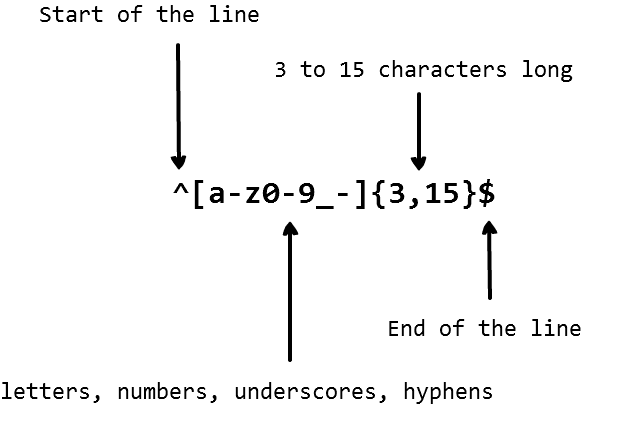

In [47]:
text = "my phone number is 1256. Ohh its wrong! Correct one is 1256348790. call me!"

In [48]:
import re

In [49]:
re.search(r'\d{10}', text)

<re.Match object; span=(55, 65), match='1256348790'>

In [50]:
re.search(r'\d{4}', text)

<re.Match object; span=(19, 23), match='1256'>

In [54]:
re.findall(r'\d{3,10}', text)

['1256', '1256348790']

In [57]:
re.findall(r'\w{4,}', text)

['phone', 'number', '1256', 'wrong', 'Correct', '1256348790', 'call']

##### wildcard text 

In [62]:
re.findall(r'c..', text)

['ct ', 'cal']

In [63]:
text = "this is cat but not that. i want hat and cat both"

In [65]:
re.findall(r'.a.', text)

['cat', 'hat', 'wan', 'hat', ' an', 'cat']

In [66]:
text = 'hi thanks for watching <3'

In [67]:
re.findall(r'\d$', text)

['3']

In [69]:
text = '3 hi thanks for watching <3'

In [70]:
re.findall(r'^\d', text)

['3']

#### Exclusion 

In [75]:
text

'3 hi thanks for watching <3'

In [73]:
re.findall(r'[^\d]+', text)

[' hi thanks for watching <']

In [82]:
text = 'hi 33 thanks for watching <3'

In [87]:
re.findall(r'[^\D]+', text)

['33', '3']

In [90]:
text = "you can get free-videos on kgp talkie"

In [91]:
re.findall(r'[\w]+-[\w]+', text)

['free-videos']

### Regular Expression in SpaCy 

Match different spellings of token texts `pattern = [{"TEXT": {"REGEX": "deff?in[ia]tely"}}]`


Match tokens with fine-grained POS tags starting with 'V' `pattern = [{"TAG": {"REGEX": "^V"}}]`

In [99]:
text = "Google announced a new Pixel at Google I/O Google I/O is a great place to get all updates from Google."

In [100]:
text

'Google announced a new Pixel at Google I/O Google I/O is a great place to get all updates from Google.'

In [101]:
pattern = [{'TEXT':'Google'}, {'TEXT': 'I'}, {'TEXT':'/'}, {'TEXT':'O'}]

In [102]:
def callback_method(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    entity = doc[start:end]
    print(entity.text)

In [103]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [104]:
doc = nlp(text)

In [105]:
matcher(doc)

Google I/O
Google I/O


[(11578853341595296054, 6, 10), (11578853341595296054, 10, 14)]

#### Find word Google 

In [106]:
pattern = [{'TEXT':'Google'}, {'TEXT': 'I', 'OP': '?'}, {'TEXT':'/', 'OP': '?'}, {'TEXT':'O', 'OP': '?'}]

In [107]:
def callback_method(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    entity = doc[start:end]
    print(entity.text)

In [108]:
matcher = Matcher(nlp.vocab)
matcher.add('Google', callback_method, pattern)

In [109]:
doc = nlp(text)

In [110]:
matcher(doc)

Google
Google
Google I
Google I/
Google I/O
Google
Google I
Google I/
Google I/O
Google


[(11578853341595296054, 0, 1),
 (11578853341595296054, 6, 7),
 (11578853341595296054, 6, 8),
 (11578853341595296054, 6, 9),
 (11578853341595296054, 6, 10),
 (11578853341595296054, 10, 11),
 (11578853341595296054, 10, 12),
 (11578853341595296054, 10, 13),
 (11578853341595296054, 10, 14),
 (11578853341595296054, 23, 24)]

## Using Linguistic Annotations 

Let’s say you’re analyzing user comments and you want to find out what people are saying about Facebook. You want to start off by finding adjectives following “Facebook is” or “Facebook was”. This is obviously a very rudimentary solution, but it’ll be fast, and a great way to get an idea for what’s in your data. Your pattern could look like this:

`[{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"}, {"POS": "ADJ"}]`

This translates to a token whose lowercase form matches “facebook” (like Facebook, facebook or FACEBOOK), followed by a token with the lemma “be” (for example, is, was, or ‘s), followed by an optional adverb, followed by an adjective.

https://spacy.io/api/annotation

In [111]:
matcher = Matcher(nlp.vocab)

In [114]:
matched_sents = []

In [113]:
pattern = [{"LOWER": "facebook"}, {"LEMMA": "be"}, {"POS": "ADV", "OP": "*"}, {"POS": "ADJ"}]

In [116]:
def callback_method_fb(matcher, doc, i, matches):
    matched_id, start, end = matches[i]
    span = doc[start:end]
    sent = span.sent
    
    match_ents = [{
        'start':span.start_char - sent.start_char,
        'end': span.end_char - sent.start_char,
        'label': 'MATCH'
    }]
    
    matched_sents.append({'text': sent.text, 'ents':match_ents})

In [117]:
matcher.add("fb", callback_method_fb, pattern)

In [118]:
doc = nlp("I'd say that Facebook is evil. – Facebook is pretty cool, right?")

In [119]:
matches = matcher(doc)

In [120]:
matches

[(8017838677478259815, 4, 7), (8017838677478259815, 9, 13)]

In [121]:
matched_sents

[{'text': "I'd say that Facebook is evil.",
  'ents': [{'start': 13, 'end': 29, 'label': 'MATCH'}]},
 {'text': '– Facebook is pretty cool, right?',
  'ents': [{'start': 2, 'end': 25, 'label': 'MATCH'}]}]

In [122]:
displacy.render(matched_sents, style='ent', manual = True)

### Phone numbers 

Phone numbers can have many different formats and matching them is often tricky. During tokenization, spaCy will leave sequences of numbers intact and only split on whitespace and punctuation. This means that your match pattern will have to look out for number sequences of a certain length, surrounded by specific punctuation – depending on the national conventions.

You want to match like this `(123) 4567 8901 or (123) 4567-8901`

`[{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "dddd"}, {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]`

In [123]:
pattern = [{"ORTH": "("}, {"SHAPE": "ddd"}, {"ORTH": ")"}, {"SHAPE": "dddd"}, {"ORTH": "-", "OP": "?"}, {"SHAPE": "dddd"}]

In [124]:
matcher = Matcher(nlp.vocab)
matcher.add("PhoneNumber", None, pattern)

In [133]:
doc = nlp("Call me at (123) 4560-7890")

In [134]:
print([t.text for t in doc])

['Call', 'me', 'at', '(', '123', ')', '4560', '-', '7890']


In [135]:
matches = matcher(doc)
matches

[(7978097794922043545, 3, 9)]

In [136]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

(123) 4560-7890


#### Email Address Matching 

In [137]:
pattern = [{"TEXT": {"REGEX": "[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+"}}]

In [138]:
matcher = Matcher(nlp.vocab)
matcher.add("Email", None, pattern)

In [139]:
text = "Email me at email2me@kgptalkie.com and talk.me@kgptalkie.com"

In [140]:
doc = nlp(text)

In [141]:
matches = matcher(doc)

In [143]:
matches

[(11010771136823990775, 3, 4), (11010771136823990775, 5, 6)]

In [144]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

email2me@kgptalkie.com
talk.me@kgptalkie.com


### Hashtags and emoji on social media 

Social media posts, especially tweets, can be difficult to work with. They’re very short and often contain various emoji and hashtags. By only looking at the plain text, you’ll lose a lot of valuable semantic information.

Let’s say you’ve extracted a large sample of social media posts on a specific topic, for example posts mentioning a brand name or product. As the first step of your data exploration, you want to filter out posts containing certain emoji and use them to assign a general sentiment score, based on whether the expressed emotion is positive or negative, e.g. 😀 or 😞. You also want to find, merge and label hashtags like #MondayMotivation, to be able to ignore or analyze them later.

By default, spaCy’s tokenizer will split emoji into separate tokens. This means that you can create a pattern for one or more emoji tokens. Valid hashtags usually consist of a #, plus a sequence of ASCII characters with no whitespace, making them easy to match as well.

In [145]:
pos_emoji = ["😀", "😃", "😂", "🤣", "😊", "😍"]  # Positive emoji
neg_emoji = ["😞", "😠", "😩", "😢", "😭", "😒"]  # Negative emoji

In [146]:
pos_emoji

['😀', '😃', '😂', '🤣', '😊', '😍']

In [147]:
# Add patterns to match one or more emoji tokens
pos_patterns = [[{"ORTH": emoji}] for emoji in pos_emoji]
neg_patterns = [[{"ORTH": emoji}] for emoji in neg_emoji]

In [148]:
pos_patterns

[[{'ORTH': '😀'}],
 [{'ORTH': '😃'}],
 [{'ORTH': '😂'}],
 [{'ORTH': '🤣'}],
 [{'ORTH': '😊'}],
 [{'ORTH': '😍'}]]

In [149]:
neg_patterns

[[{'ORTH': '😞'}],
 [{'ORTH': '😠'}],
 [{'ORTH': '😩'}],
 [{'ORTH': '😢'}],
 [{'ORTH': '😭'}],
 [{'ORTH': '😒'}]]

In [150]:
def label_sentiment(matcher, doc, i, matches):
    match_id, start, end = matches[i]
    if doc.vocab.strings[match_id] == 'HAPPY':
        doc.sentiment += 0.1
    elif doc.vocab.strings[match_id] == 'SAD':
        doc.sentiment -= 0.1

In [151]:
matcher = Matcher(nlp.vocab)

In [152]:
matcher.add("HAPPY", label_sentiment, *pos_patterns)
matcher.add('SAD', label_sentiment, *neg_patterns)

In [153]:
matcher.add('HASHTAG', None, [{'TEXT': '#'}, {'IS_ASCII': True}])

In [160]:
doc = nlp("Hello world 😀 #KGPTalkie")

In [161]:
matches = matcher(doc)

In [162]:
for match_id, start, end in matches:
    string_id = doc.vocab.strings[match_id]  # Look up string ID
    span = doc[start:end]
    print(string_id, span.text)

HAPPY 😀
HASHTAG #KGPTalkie


### Efficient phrase matching

If you need to match large terminology lists, you can also use the PhraseMatcher and create Doc objects instead of token patterns, which is much more efficient overall. The Doc patterns can contain single or multiple tokens.



In [163]:
from spacy.matcher import PhraseMatcher

In [164]:
matcher = PhraseMatcher(nlp.vocab)

In [165]:
terms = ['BARAC OBAMA', 'ANGELA MERKEL', 'WASHINGTON D.C.']

In [166]:
pattern = [nlp.make_doc(text) for text in terms]

In [167]:
pattern

[BARAC OBAMA, ANGELA MERKEL, WASHINGTON D.C.]

In [168]:
matcher.add('term', None, *pattern)

In [180]:
doc = nlp("German Chancellor ANGELA MERKEL and US President BARAC OBAMA "
          "converse in the Oval Office inside the White House in WASHINGTON D.C.")

In [181]:
doc

German Chancellor ANGELA MERKEL and US President BARAC OBAMA converse in the Oval Office inside the White House in WASHINGTON D.C.

In [182]:
matches = matcher(doc)

In [183]:
for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text)

ANGELA MERKEL
BARAC OBAMA
WASHINGTON D.C.


In [184]:
matches

[(4519742297340331040, 2, 4),
 (4519742297340331040, 7, 9),
 (4519742297340331040, 19, 21)]

### Custom Rule Based Entity Recognition

The EntityRuler is an exciting new component that lets you add named entities based on pattern dictionaries, and makes it easy to combine rule-based and statistical named entity recognition for even more powerful models.

##### Entity Patterns 

Entity patterns are dictionaries with two keys: "label", specifying the label to assign to the entity if the pattern is matched, and "pattern", the match pattern. The entity ruler accepts two types of patterns:

- Phrase Pattern
`{"label": "ORG", "pattern": "Apple"}`
- Token Pattern `{"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}`

##### Using the entity ruler 

The EntityRuler is a pipeline component that’s typically added via nlp.add_pipe. When the nlp object is called on a text, it will find matches in the doc and add them as entities to the doc.ents, using the specified pattern label as the entity label.

https://spacy.io/api/annotation#named-entities

In [185]:
from spacy.pipeline import EntityRuler

In [186]:
nlp = spacy.load('en_core_web_sm')

In [187]:
ruler = EntityRuler(nlp)

In [188]:
patterns = [{"label": "ORG", "pattern": "KGP Talkie"},
            {"label": "GPE", "pattern": [{"LOWER": "san"}, {"LOWER": "francisco"}]}]

In [190]:
patterns

[{'label': 'ORG', 'pattern': 'KGP Talkie'},
 {'label': 'GPE', 'pattern': [{'LOWER': 'san'}, {'LOWER': 'francisco'}]}]

In [191]:
ruler.add_patterns(patterns)

In [192]:
nlp.add_pipe(ruler)

In [193]:
doc = nlp("KGP Talkie is opening its first big office in San Francisco.")

In [194]:
doc

KGP Talkie is opening its first big office in San Francisco.

In [196]:
for ent in doc.ents:
    print(ent.text, ent.label_)

KGP Talkie ORG
first ORDINAL
San Francisco GPE
